In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import random

import sys
import matplotlib
import sklearn
import numpy
import keras
import tensorflow as tf 
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Convolution2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import Callback

Using TensorFlow backend.


In [2]:
print('Versão Python ', sys.version)
print('Versão Numpy ', numpy.version.version)
print('Versão Pandas ', pd.__version__)
print('Versão Matplotlib ', matplotlib.__version__)
print('Versão Sklearn ', sklearn.__version__)
print('Versão Keras', keras.__version__)
print('Versão TensorFlow', tf.__version__)

Versão Python  3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:18:16) [MSC v.1916 64 bit (AMD64)]
Versão Numpy  1.17.4
Versão Pandas  0.25.3
Versão Matplotlib  3.1.2
Versão Sklearn  0.22.1
Versão Keras 2.3.1
Versão TensorFlow 2.0.0


In [3]:
IdLookupTable = pd.read_csv('IdLookupTable.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')
training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

In [4]:
training = training.dropna()

In [5]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [6]:
X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)

In [7]:
y = training.drop(['Image'], axis=1)

In [8]:
y_ndarray = y.to_numpy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ndarray, test_size=0.3, random_state=42)

In [10]:
model = Sequential()

In [11]:
def add_model(model, filters, maxpooling, *inputshape):   
    if inputshape:
        model.add(Convolution2D(filters, (5,5), padding='same', use_bias=False, input_shape=(96,96,1)))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
    else:
      if maxpooling:
        model.add(Convolution2D(filters, (5,5), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
      else:
        model.add(Convolution2D(filters, (5,5), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())

In [12]:
add_model(model, 32, False, True)

In [13]:
add_model(model, 32, True)
add_model(model, 64, False)
add_model(model, 64, True)
add_model(model, 128, False)
add_model(model, 128, True)
add_model(model, 256, False)
add_model(model, 256, True)
add_model(model, 512, False)
add_model(model, 512, True)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30))

In [15]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae', 'acc'])

In [16]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'layer10_epoc100_kernel5p5_dropout0p3.hdf5', monitor='val_mae', verbose=1, save_best_only=False)

In [17]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.02, callbacks=[checkpointer])

Train on 1468 samples, validate on 30 samples
Epoch 1/100
1468/1468 [==============================] - 437s 297ms/step - loss: 223.9087 - mae: 10.2460 - acc: 0.3249 - val_loss: 10601.7715 - val_mae: 88.7083 - val_acc: 0.8000

Epoch 00001: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 2/100
1468/1468 [==============================] - 439s 299ms/step - loss: 56.4271 - mae: 5.9290 - acc: 0.4203 - val_loss: 9859.3701 - val_mae: 89.0257 - val_acc: 0.2667

Epoch 00002: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 3/100
1468/1468 [==============================] - 498s 339ms/step - loss: 45.5365 - mae: 5.3063 - acc: 0.4264 - val_loss: 227.6225 - val_mae: 12.8415 - val_acc: 0.7667

Epoch 00003: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 4/100
1468/1468 [==============================] - 525s 358ms/step - loss: 41.7876 - mae: 5.0651 - acc: 0.4748 - val_loss: 110.0905 - val_mae: 9.2538 - val_acc: 0.7333

Epoch 00004: saving model to laye

1468/1468 [==============================] - 388s 264ms/step - loss: 14.3050 - mae: 2.8896 - acc: 0.6969 - val_loss: 5.4565 - val_mae: 1.8049 - val_acc: 0.7667

Epoch 00034: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 35/100
1468/1468 [==============================] - 404s 275ms/step - loss: 14.7458 - mae: 2.9325 - acc: 0.6914 - val_loss: 5.0458 - val_mae: 1.6810 - val_acc: 0.8667

Epoch 00035: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 36/100
1468/1468 [==============================] - 388s 264ms/step - loss: 14.3605 - mae: 2.8860 - acc: 0.7010 - val_loss: 9.1581 - val_mae: 2.5109 - val_acc: 0.7667

Epoch 00036: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 37/100
1468/1468 [==============================] - 390s 265ms/step - loss: 13.6145 - mae: 2.8313 - acc: 0.6880 - val_loss: 5.2971 - val_mae: 1.7319 - val_acc: 0.9000

Epoch 00037: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 38/100
1468/1468 [=========


Epoch 00067: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 68/100
1468/1468 [==============================] - 385s 262ms/step - loss: 11.9700 - mae: 2.6344 - acc: 0.7091 - val_loss: 4.1502 - val_mae: 1.5535 - val_acc: 0.6667

Epoch 00068: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 69/100
1468/1468 [==============================] - 390s 266ms/step - loss: 11.5406 - mae: 2.5834 - acc: 0.7187 - val_loss: 3.1880 - val_mae: 1.2981 - val_acc: 0.8000

Epoch 00069: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 70/100
1468/1468 [==============================] - 388s 264ms/step - loss: 12.1977 - mae: 2.6612 - acc: 0.7180 - val_loss: 3.7621 - val_mae: 1.4720 - val_acc: 0.8667

Epoch 00070: saving model to layer10_epoc100_kernel5p5_dropout0p3.hdf5
Epoch 71/100
1468/1468 [==============================] - 390s 266ms/step - loss: 11.1667 - mae: 2.5539 - acc: 0.7275 - val_loss: 2.9512 - val_mae: 1.2748 - val_acc: 0.8667

Epoch 00071: saving

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.871717492367991
Test accuracy: 1.4890272617340088


In [19]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)
train_predicts = model.predict(X_train)

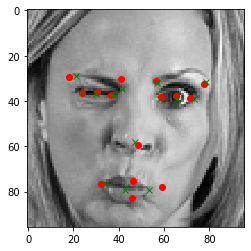

In [20]:
plt.imshow(X_train[0].reshape((96,96)), cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[0][i-1], train_predicts[0][i], 'ro')
    plt.plot(y_train[0][i-1], y_train[0][i], 'x', color='green')

plt.show()

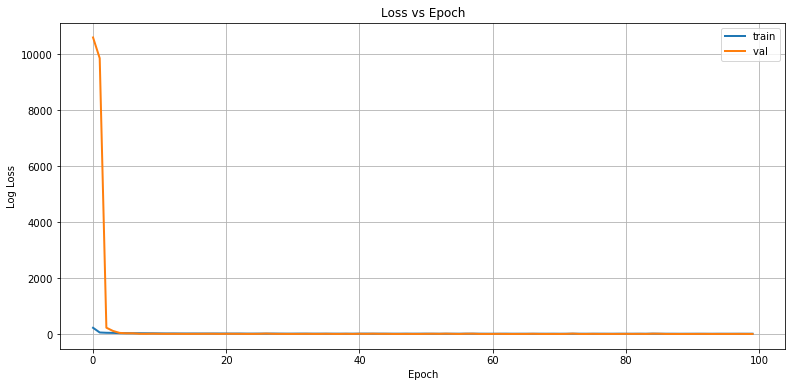

<Figure size 1440x1080 with 0 Axes>

In [21]:
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'], linewidth=2, label="train")
plt.plot(history.history['val_loss'], linewidth=2, label="val ")
plt.legend()
plt.title('Loss vs Epoch')
plt.grid()

plt.xlabel("Epoch")
plt.ylabel("Log Loss")
fig= plt.figure(figsize=(20,15))
plt.show()

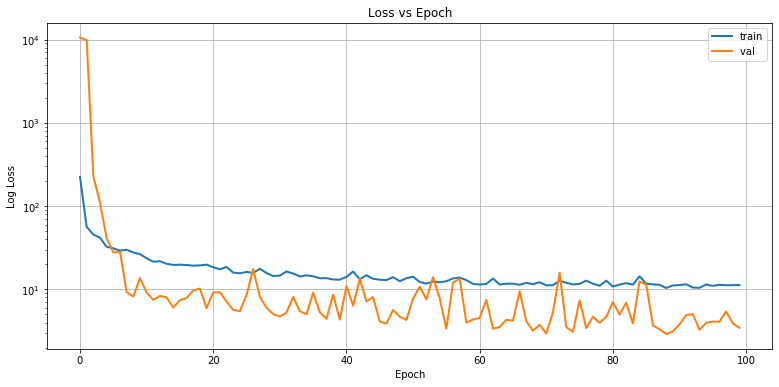

<Figure size 1440x1080 with 0 Axes>

In [22]:
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'], linewidth=2, label="train")
plt.plot(history.history['val_loss'], linewidth=2, label="val ")
plt.legend()
plt.title('Loss vs Epoch')
plt.grid()
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
fig= plt.figure(figsize=(20,15))
plt.show()

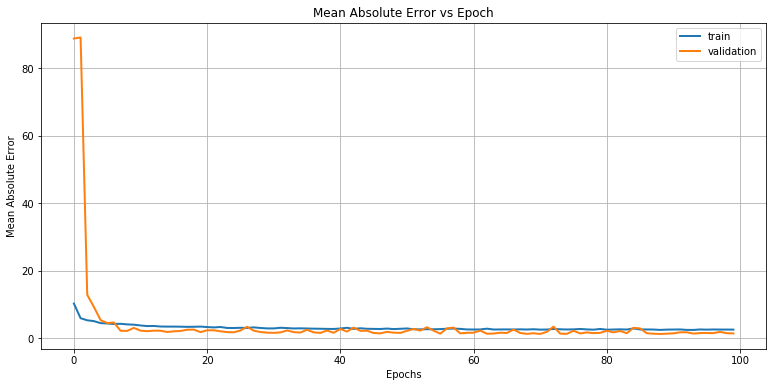

In [23]:
plt.figure(figsize=(13,6))
plt.plot(history.history['mae'], linewidth=2)
plt.plot(history.history['val_mae'], linewidth=2)
plt.title('Mean Absolute Error vs Epoch')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

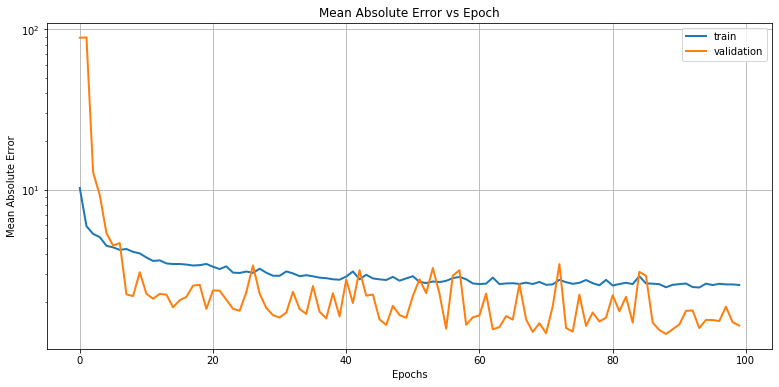

In [25]:
plt.figure(figsize=(13,6))
plt.plot(history.history['mae'], linewidth=2)
plt.plot(history.history['val_mae'], linewidth=2)
plt.title('Mean Absolute Error vs Epoch')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.yscale("log")
plt.grid()
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

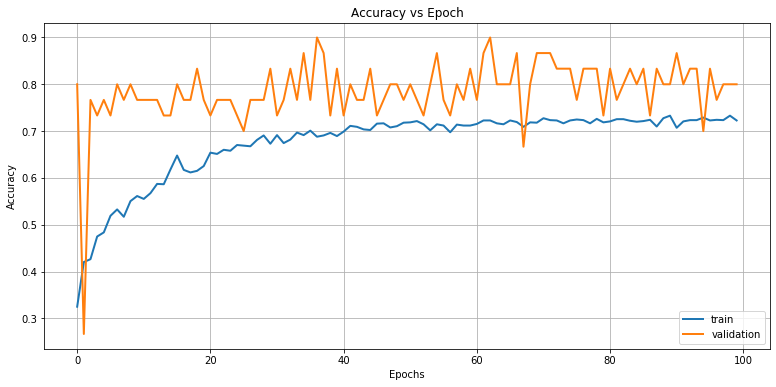

In [24]:
plt.figure(figsize=(13,6))
plt.plot(history.history['acc'], linewidth=2)
plt.plot(history.history['val_acc'], linewidth=2)
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [26]:
predict = model.predict(test_X)

In [27]:
header = list(y.columns)

In [28]:
df_predict = pd.DataFrame(predict, columns = header)

In [29]:
for i in range(IdLookupTable.shape[0]):
    IdLookupTable.Location[i] = df_predict.loc[IdLookupTable.ImageId[i]-1][IdLookupTable.FeatureName[i]]

c:\users\alexandre\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
SampleSubmission.Location = IdLookupTable.Location

In [31]:
SampleSubmission.to_csv('submission_100_epochs_kernel5x5dropout0p3.csv', index=False)

In [32]:
pd.DataFrame(history.history.items()).to_csv('history_submission_100_epochs_kernel5x5_dropout0p3.csv', index=False)